## 從字庫裡面把字隨機挑出來組成二字詞或三字詞，然後強迫他們滿足log-normal law，之後用這些詞組成文本

In [1]:
import random 
import bisect 
import math 
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from count import *
%matplotlib inline

In [2]:
class LogGaussianGenerator: 
    """
    GaussianGenerator is an immutable type representing a Gaussian CDF
    with patameters sigma and n; centre located at 1.0   

    """

    
    def __init__(self, n, sigma , mu = 0.0): 
        """Ininitialize a Gaussian CDF.
         Paramerters
         n: int 
            n >= 0
         
         sigma: float 
            sigma >= 1
            
         mu: float
        """
        # Calculate non-normalized cumulative values from 1 to n: 
        assert n >= 0 and sigma >= 1.0
        assert int(n) == n 
        self.n = n
        self.sigma = sigma
        self.mu = mu
        tmp = [(math.exp(-(math.log(i) - mu)**2 / (2 * sigma**2))/(i * sigma)) for i in range(1, n+1)] 
        zeta = reduce(lambda sums, x: sums + [sums[-1] + x], tmp, [0]) 

        # Store the translation map: 
        # Abstract function: representing the cumulative distribution function 
        # of a Gaussian pmf 
        self.distMap = [x / zeta[-1] for x in zeta] 

    def next(self): 
        """Yield an integer between 0 and n, with probability governed by 
        Zipf distribution function specified by n and alpha.
        """
        # Take a uniform 0-1 pseudo-random value: 
        u = random.random()  

        # Translate the Zipf variable: 
        return bisect.bisect(self.distMap, u) - 1
    
    def __get_alpha(self):
        ans = self.alpha
        return ans
    
    def __get_n(self):
        ans = self.n
        return ans



In [3]:
def read_file_generate_fake(char_num = 2, out_file =  'fake1.txt', sample_word_num = 8000,
                            num_word_in_fake_scrip = 15000, 
                            alpha = 1.00001, noun = False):
    """Read "roc2.txt" file, and then generate a fake script satisfying Zipfs' law. All the words in 
    the output script share the same lenth char_num
    """
    SAMPLE_WORD_NUM = sample_word_num
    ALPHA = alpha
    NUM_WORD_IN_NOV = num_word_in_fake_scrip
    OUTPUT_FILE_NAME = out_file
    NOUN = noun
    CHAR_NUM = char_num
    
    gau_gen =  LogGaussianGenerator(SAMPLE_WORD_NUM,ALPHA)
    f =  open("roc2.txt","r")

    world_list = []
    
    for line in f:
        line_split = line.split("\t")
        if NOUN:
            if 'N' in line_split[4]:
                world_list.append(line_split[3])
        else:
            #if len(line_split[3]) == CHAR_NUM:
                world_list.append(line_split[3])

    f.close()
    
    for item in world_list:
        if item == " ":
            world_list.remove(item)
    #######################################
    ###these codes are optional 
    
    tmp_list = []
    for item in world_list:
        for e in list(item):
            tmp_list.append(e)
    random.shuffle(tmp_list)
    list_2 = []
    tmp = ''
    for e in tmp_list:
        tmp = tmp + e
        if len(tmp) == char_num:
            list_2.append(tmp)
            tmp = ''
    
    world_list = list_2

    print("words in a corpus: " ,len(world_list))
    
    
    #######################################


    print("A corpus is successfully loaded.")
    
    random.shuffle(world_list)
    small_world_list = world_list[-SAMPLE_WORD_NUM:]
    target_string_list = []

    for i in range(NUM_WORD_IN_NOV):
        num = gau_gen.next()
        w = small_world_list[num]
        target_string_list.append(w+" ")
        
    f2 = open(OUTPUT_FILE_NAME , 'w')

    word_count = 0
    for item in target_string_list:
        if word_count < 20:
            f2.write(item)
            word_count += 1
        else:
            word_count = 0
            f2.write(item+"\n")
    f2.close()
    print("A fake script is successfully created !")
    print("--------------------")
    return None

## 改動不同的參數以產生你想要的文本
#### 參數解釋：
* char_num: 假文本裡面每個單詞的字數
* out_file: 輸出的假文本的檔名
* sample_word_num: zipf's law 的參數之一
* num_word_in_fake_scrip: 輸出的假文本總共有多少單詞
* alpha: Zipf's law 的參數之二
* noun: 只選roc2.txt(中研院詞庫)中的名詞與否

In [14]:
read_file_generate_fake(char_num = 3, out_file =  'JAN14FAKE1.txt', sample_word_num = 12000,
                            num_word_in_fake_scrip = 200000, 
                            alpha = 1000.0, noun = False)

words in a corpus:  21626
A corpus is successfully loaded.
A fake script is successfully created !
--------------------


In [15]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.
filename = 'JAN14FAKE1.txt' #change filename if you want to get statictical information of another
##text file.
big, char, word = main(filename,encode) 

Read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


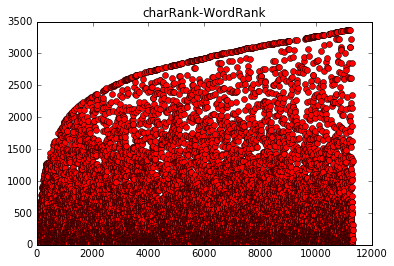

In [16]:
xx = big["0th_char_rank"]
plt.title('charRank-WordRank')
plt.plot(xx,'ro')

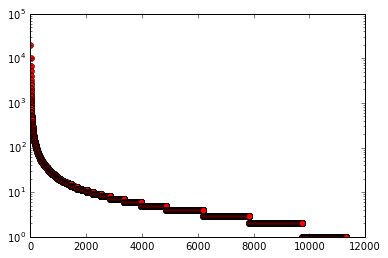

In [17]:
yy = word['wordFreq']
plt.yscale('log')
#plt.xscale('log')
plt.plot(yy,'ro')

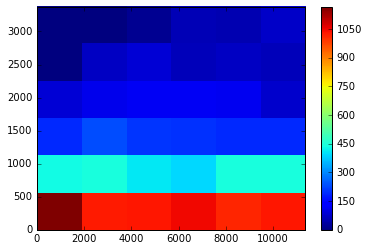

In [18]:
draw_density_plot(big, 6,)

In [13]:
check_const_ratio(word)


wordRank  ratio:  [ 0.86308677  0.8092295   0.78869654  0.79422208  0.80552733  0.83804238
  0.86514148  0.86499652  0.88656476  0.89337568  0.91518537  0.91675916
  0.91585956  0.93126239  0.93541519  0.93778452  0.94660194  0.93931624
  0.94813467  0.95297505  0.95971803  0.95068206  0.94922737  0.9627907
  0.9589372   0.96095718  0.97378768  0.97442799  0.96685083  0.96285714
  0.96884273  0.97090352  0.96845426  0.96091205  0.97966102  0.97058824
  0.96969697  0.97242647  0.97920605  0.95752896  0.98387097  0.97540984
  0.97268908  0.98704104  0.9868709   0.97117517  0.97945205  0.96969697
  0.97596154  0.97044335  0.96954315  0.97905759  0.99465241  0.97311828
  0.98618785  0.9859944   0.98295455  0.98554913  0.98533724  0.99404762
  0.97305389  0.99076923  0.99378882  0.978125    0.99361022  0.98713826
  0.99348534  0.97377049  0.98989899  0.98979592  0.99312715  0.97231834
  0.98576512  0.98194946  0.99264706  0.98518519  0.97744361  0.98461538]
std=  0.0487595923108


array([  1.12480000e+04,   8.63086771e-01,   8.09229501e-01,
         7.88696538e-01,   7.94222079e-01,   8.05527332e-01,
         8.38042381e-01,   8.65141481e-01,   8.64996521e-01,
         8.86564763e-01,   8.93375681e-01,   9.15185373e-01,
         9.16759156e-01,   9.15859564e-01,   9.31262393e-01,
         9.35415188e-01,   9.37784522e-01,   9.46601942e-01,
         9.39316239e-01,   9.48134668e-01,   9.52975048e-01,
         9.59718026e-01,   9.50682057e-01,   9.49227373e-01,
         9.62790698e-01,   9.58937198e-01,   9.60957179e-01,
         9.73787680e-01,   9.74427995e-01,   9.66850829e-01,
         9.62857143e-01,   9.68842730e-01,   9.70903522e-01,
         9.68454259e-01,   9.60912052e-01,   9.79661017e-01,
         9.70588235e-01,   9.69696970e-01,   9.72426471e-01,
         9.79206049e-01,   9.57528958e-01,   9.83870968e-01,
         9.75409836e-01,   9.72689076e-01,   9.87041037e-01,
         9.86870897e-01,   9.71175166e-01,   9.79452055e-01,
         9.69696970e-01,